# Problem Statement

To predict future ODI cricket match winner based on previous year's match result.

# Introduction

- Cricket is one of the most popular sports in world, especially in India. The game is highly uncertain.
- It is the sport which generate high revenue.
- What if the winner team of the match can be predicted before the match, even have begin?
- Because we are predicting a output which is categorical value, that is the probelm is a classification problem.

## Dataset Desciption

The dataset folder contains the following file:

ODI-data-1971-2017.csv = 3932 rows x 7 columns

Columns Provided in the Dataset

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date

ODI-data-2017-2021.csv = 495 x 8 columns

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date
8. Unnamed: 0

# For this problem we will be using samples from 2010 to 2021.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#importing necessary libraries
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [3]:
# load the datasets ODI_data_1971_2017 and ODI_data_2017_2021
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cloud-ML Projects/ODI cricket match/ODI-data-1971-2017.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cloud-ML Projects/ODI cricket match/ODI-Data-2017-2021.csv")

In [4]:
# ODI_data_1971_2017 data
df1.tail()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"
3931,ODI # 3932,India,New Zealand,India,6 runs,Kanpur,"Oct 29, 2017"


In [5]:
# ODI_data_2017_2021 data
df2.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,0,ODI # 3817,Australia,Pakistan,Australia,92 runs,Brisbane,"Jan 13, 2017"
1,1,ODI # 3818,Australia,Pakistan,Pakistan,6 wickets,Melbourne,"Jan 15, 2017"
2,2,ODI # 3819,India,England,India,3 wickets,Pune,"Jan 15, 2017"
3,3,ODI # 3820,Australia,Pakistan,Australia,7 wickets,Perth,"Jan 19, 2017"
4,4,ODI # 3821,India,England,India,15 runs,Cuttack,"Jan 19, 2017"


Droping rows of year 2017 pesent in ODI 2017 to 2021 dataset wich are alredy present in ODI 1971 to 2017 data

In [6]:
# Droping rows with index range 0 to 116
df2 = df2.drop(range(0, 116))

# Reset index of the dataframe
df2.reset_index(inplace = True)
# Drop the extra 'index' column from dataframe
df2 = df2.drop("index", axis = 1)
df2.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,116,ODI # 3933,P.N.G.,Scotland,Scotland,6 wickets,Dubai (DSC),"Nov 24, 2017"
1,117,ODI # 3934,P.N.G.,Scotland,Scotland,4 wickets,Dubai (DSC),"Nov 25, 2017"
2,118,ODI # 3935,Afghanistan,Ireland,Afghanistan,138 runs,Sharjah,"Dec 5, 2017"
3,119,ODI # 3936,Hong Kong,P.N.G.,Hong Kong,23 runs,ICCA Dubai,"Dec 6, 2017"
4,120,ODI # 3937,Afghanistan,Ireland,Ireland,51 runs,Sharjah,"Dec 7, 2017"


In [7]:
# Load ODI_data_1971_2021 the dataset
df1 = pd.concat([df1, df2], ignore_index = True)

In [8]:
# ODI_data_1971_2021 data
df1.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Unnamed: 0
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",NaN
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",NaN
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",NaN
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",NaN
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",NaN


In [9]:
# Drop "Unnamed: 0" column
df1.drop(["Unnamed: 0"], axis = 1, inplace = True)
df1.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [10]:
# Drop values from 0 to 2936 as it all conten samples of before year 2010
# Store all remaining smaple in new dataframe
df = df1.drop(range(0, 2936), axis = 0)

In [11]:
# Reset index of the new dataframe
df.reset_index()

,index,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,2936,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,2937,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,2938,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,2939,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,2940,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...,...
1370,4306,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1371,4307,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1372,4308,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1373,4309,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [12]:
# Remove extra 'index' Column from ew dataframe 
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
2936,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
2937,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2938,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
2939,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
2940,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"


In [13]:
# ODI_data_2010_2021 data
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
2936,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
2937,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2938,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
2939,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
2940,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"


# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [14]:
# Check all column names
df.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [15]:
# Check info of complete dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 2936 to 4310
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   1375 non-null   object
 1   Team 1      1375 non-null   object
 2   Team 2      1375 non-null   object
 3   Winner      1375 non-null   object
 4   Margin      1326 non-null   object
 5   Ground      1375 non-null   object
 6   Match Date  1375 non-null   object
dtypes: object(7)
memory usage: 85.9+ KB


After checking the Dtypes of all the columns 
  1. object - String values
  3. All the columns are of string datatype

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [16]:
# For more information on the dataset like the total count in all the columns
df.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,1375,1375,1375,1375,1326,1375,1375
unique,1375,23,23,25,213,124,1150
top,ODI # 2937,England,Pakistan,India,6 wickets,Dhaka,"Mar 6, 2018"
freq,1,141,175,164,126,87,4


## Get the total number of samples in the dataset using the len() function

In [17]:
# print len of the datset 
df.shape[0]

1375

## Get unique values

In [18]:
# loop through datatset to find count of unique values of each column
for i in df.columns:
  print("{} : {}".format(i, len(df[i].unique())))

Scorecard : 1375
Team 1 : 23
Team 2 : 23
Winner : 25
Margin : 214
Ground : 124
Match Date : 1150


## Counting the total number of missing values

In [19]:
# Check for missing values in all the columnns of the dataset
df.isnull().sum()

Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

By the observation gather from the ODI_data_2010_2021.info() , we can know there are missing values in the "Margin" column of dataset

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [20]:
# Import necessary libraries needed for performing Chi-square test
from scipy.stats import chi2_contingency, chi2

# Helper function for performing chi-square test
def chi_square_test(var1, var2):
    
    #Contingency Table
    contingency_table = pd.crosstab(df[var1], df[var2])
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]
    
    #Degree of Freedom
    num_rows = len(contingency_table.iloc[0:, 0])
    num_cols = len(contingency_table.iloc[0, 0:])
    dof = (num_rows -1) * (num_cols - 1)
    print("Degree of Freedom : ", dof)

    
    #Significance Level 5%
    alpha = 0.05
    print("Significance Level : ", alpha)
    
    #chi-square statistic
    chi2_ = sum([((o - e) ** 2)/ e for o, e in zip(observed_values, expected_values)])
    chi2_statistic = chi2_[0] + chi2_[1]
    print("Chi-square statistic: ", chi2_statistic)

    #critical_value
    critical_value = chi2.ppf(q = 1-alpha, df = dof)
    print("Critical Value: ", critical_value)
    
    #p-value
    p_value = 1- chi2.cdf(x = chi2_statistic, df = dof)
    print("P-Value: ", p_value)

   
    # check condition based on chi_square_statistic and critical value for hypothesis rejection     
    if chi2_statistic >= critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
        
    # check condition based on p value and alpha for hypothesis rejection  
    
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    

In [21]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in df.columns:
  for i in df.columns:
    if i != x:
      print("chi-square test on {} {}".format(x, i), "\n")
      chi_square_test(x, i)
      print("-------------------------------------------------------------------\n")






chi-square test on Scorecard Team 1 

Degree of Freedom :  30228
Significance Level :  0.05
Chi-square statistic:  2549.9999999999623
Critical Value:  30633.567183419527
P-Value:  1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on Scorecard Team 2 

Degree of Freedom :  30228
Significance Level :  0.05
Chi-square statistic:  2592.0000000000355
Critical Value:  30633.567183419527
P-Value:  1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on Scorecard Winner 

Degree of Freedom :  32976
Significance Level :  0.05
Chi-square statistic:  2557.000000000013
Critical Value:  33399.55082702824
P-Value:  1.0
Retain H0,There is no relationship between 2

From above chi-square test:

There is correlation between Team 1 and Winner data.

## groupby

You can use groupby to chunk up your data into subsets for further analysis.

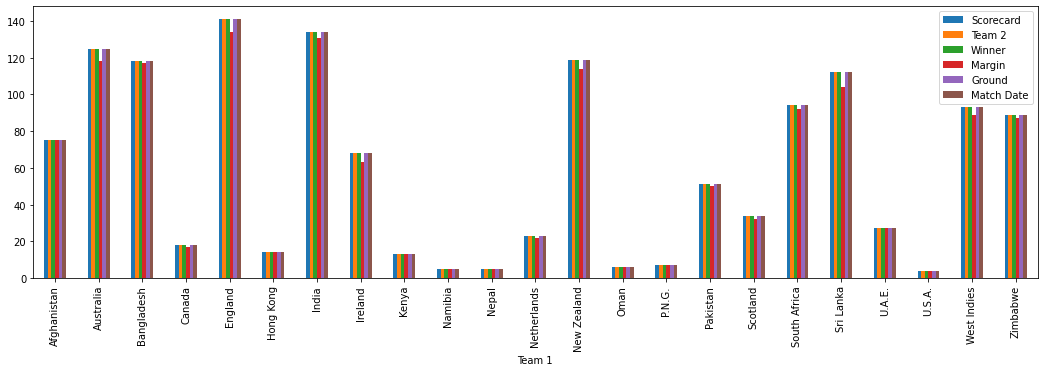

In [22]:
# group data by Team 1 and plot count plot
df.groupby("Team 1").count().plot(kind= "bar", figsize = (18, 5))


from above graph:
1. There are more samples of team 1 as Australia, Bangladesh, England, India, New Zealand, West Indies, Zimbabwe as compared to other teams
2. Samples of team 1 as  Namibia, Oman, Nepal, P.N.G, U.S.A are very less

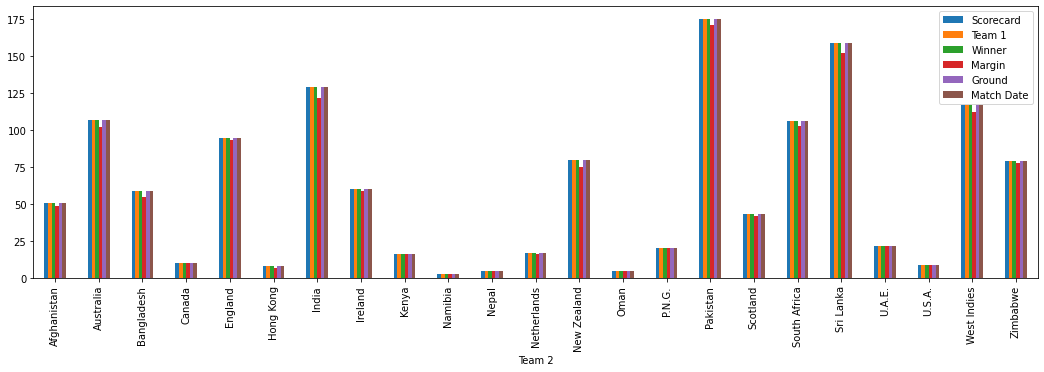

In [23]:
# group data by Team 2 and plot count plot
df.groupby("Team 2").count().plot(kind= "bar", figsize = (18, 5))


from above graph:
1. There are more samples of team 2 as Afghanistan, Australia, Bangladesh, England, India, Pakistan, Ireland, New Zealand, West Indies, Sri Lanks, South Africa Zimbabwe as compared to other teams
2. Samples of team 2 as  Namibia, Oman, Nepal, P.N.G, U.S.A, kenya, Hong Kong, Canada are very less

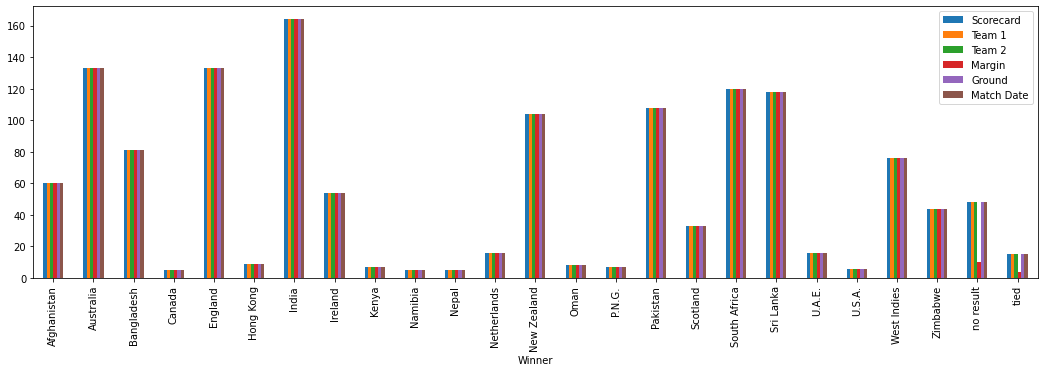

In [24]:
# group data by Winner and plot count plot
df.groupby("Winner").count().plot(kind= "bar", figsize = (18, 5))


from above graph:
1. There are more samples of Winner as Australia, Bangladesh, England, India, Pakistan, New Zealand, West Indies, Zimbabwe, South Africa, Sri Lanka as compared to other teams
2. Samples of Winner as Canada, Hong Kong, Kenya, Namibia, Oman, Nepal, P.N.G, U.S.A are very less
3. Also there are many matches with no result nad few which were tied.

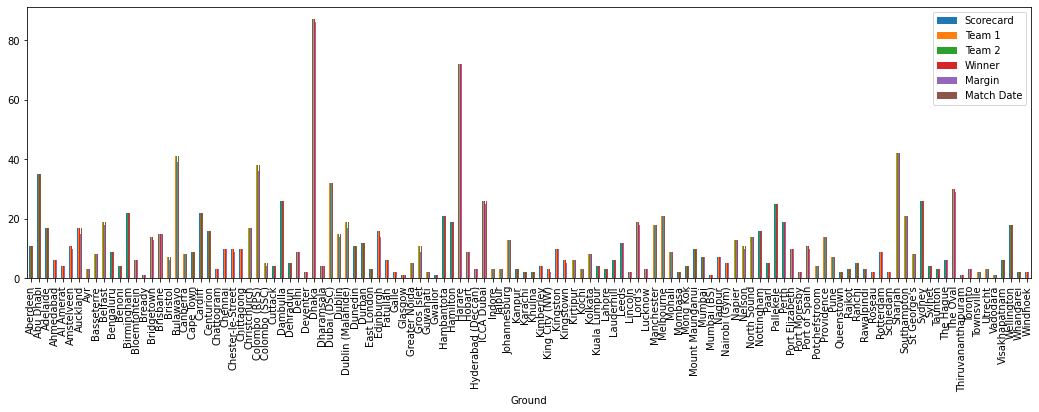

In [25]:
# group data by Ground and plot count plot
df.groupby("Ground").count().plot(kind= "bar", figsize = (18, 5))


from above graph:
1. There are more samples of ground Dhaka, Harare, Abu dhabi, Bulawayo, Colombo (RPS), Sharjah

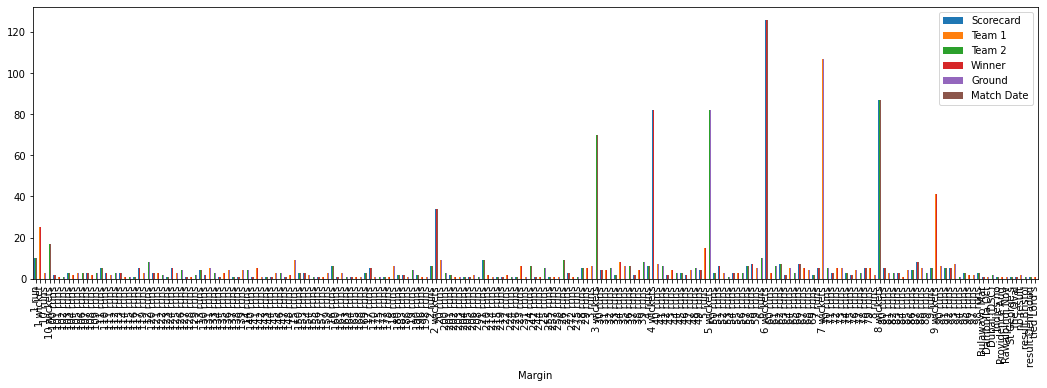

In [26]:
# group data by Margin and plot count plot
df.groupby("Margin").count().plot(kind= "bar", figsize = (18, 5))


from above graph:
1. Few Matches margin are very high then other matches, we need two sclae these numbers.

## Catplot

Catplot shows frequencies of the of more than one categorical values at a time.

We will be doing categorical scatterplot using "swarm" kind 

<Figure size 1440x504 with 0 Axes>

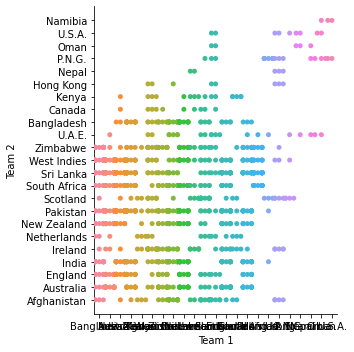

In [28]:
# cat plot between Team 1 and Team 2 column using kind="swarm"
plt.figure(figsize = (20, 7))
sns.catplot(data = df, x = "Team 1", y = "Team 2", kind = "swarm")
plt.show()

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

<Figure size 1440x504 with 0 Axes>

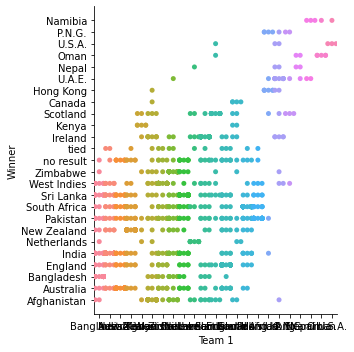

In [29]:
# cat plot between Team 1 and Winner column using kind="swarm"
plt.figure(figsize = (20, 7))
sns.catplot(data = df, x = "Team 1", y = "Winner", kind = "swarm")
plt.show()

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

<Figure size 1296x576 with 0 Axes>

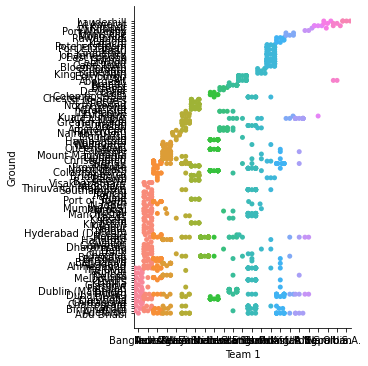

In [ ]:
# cat plot between Team 1 and Ground column using kind="swarm"
plt.figure(figsize = (20, 7))
sns.catplot(data = df, x = "Team 1", y = "Ground", kind = "swarm")
plt.show()

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

<Figure size 1296x576 with 0 Axes>

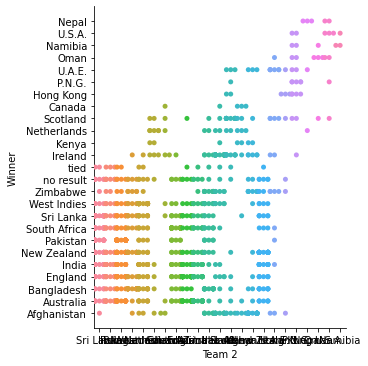

In [ ]:
# cat plot between Team 2 and Winner column using kind="swarm"
plt.figure(figsize = (20, 7))
sns.catplot(data = df, x = "Team 2", y = "Winner", kind = "swarm")
plt.show()

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

<Figure size 1296x576 with 0 Axes>

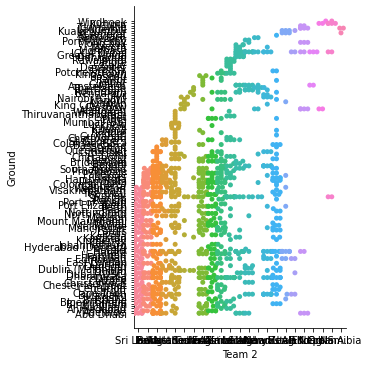

In [ ]:
# cat plot between Team 2 and Ground column using kind="swarm"
plt.figure(figsize = (20, 7))
sns.catplot(data = df, x = "Team 2", y = "Ground", kind = "swarm")
plt.show()

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

<Figure size 1296x576 with 0 Axes>

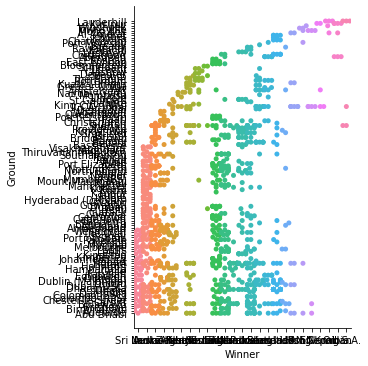

In [ ]:
# cat plot between Winner and Ground column using kind="swarm"
plt.figure(figsize = (20, 7))
sns.catplot(data = df, x = "Winner", y = "Ground", kind = "swarm")
plt.show()

From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


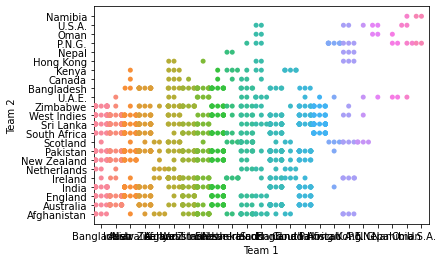

In [ ]:
# swarm plot between Team 1 and Team 2 column
plt.figure(figsize = (20, 7))
sns.swarmplot(data = df, x = "Team 1", y = "Team 2")
plt.show()


From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

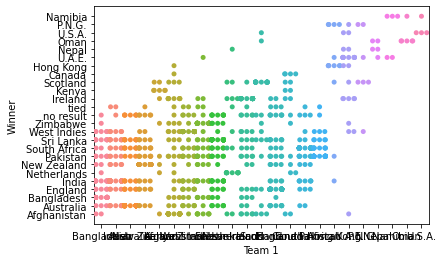

In [ ]:
# swarm plot between Team 1 and Winner column
plt.figure(figsize = (20, 7))
sns.swarmplot(data = df, x = "Team 1", y = "Winner")
plt.show()


From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

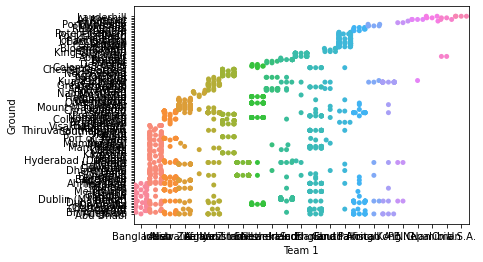

In [ ]:
# swarm plot between Team 1 and Ground column
plt.figure(figsize = (20, 7))
sns.swarmplot(data = df, x = "Team 1", y = "Ground")
plt.show()

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

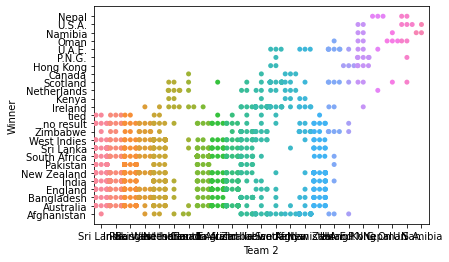

In [ ]:
# swarm plot between Team 2 and Winner column
plt.figure(figsize = (20, 7))
sns.swarmplot(data = df, x = "Team 2", y = "Winner")
plt.show()

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

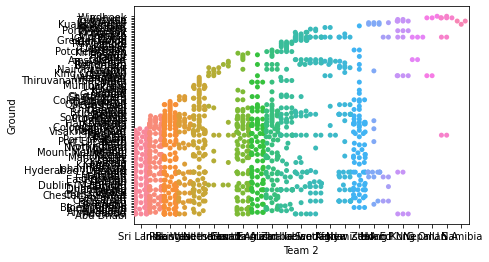

In [ ]:
# swarm plot between Team 2 and Ground column
plt.figure(figsize = (20, 7))
sns.swarmplot(data = df, x = "Team 2", y = "Ground")
plt.show()

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

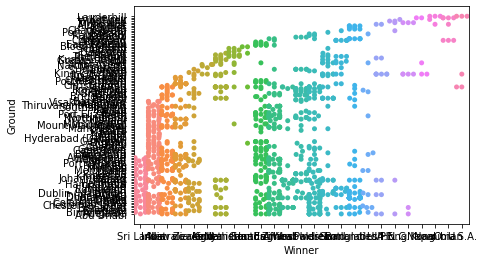

In [ ]:
# swarm plot between Winner and Ground column
plt.figure(figsize = (20, 7))
sns.swarmplot(data = df, x = "Winner", y = "Ground")
plt.show()

From the above graph:
1. Many winner teams are having matches repeatedly at a particular range of ground.

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

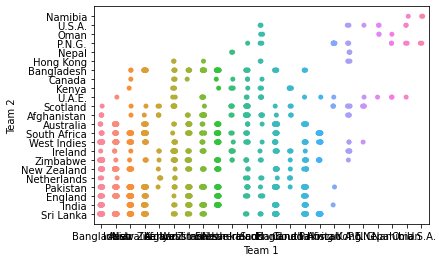

In [ ]:
# strip plot between Team 1 and Team 2 column
plt.figure(figsize = (20, 7))
sns.stripplot(data = df, x = "Team 1", y = "Team 2")
plt.show()

From the above graph:
1. Almost all team 1 had matches with almost all team 2
2. But there are few teams which have few matches with few team not with al teams.

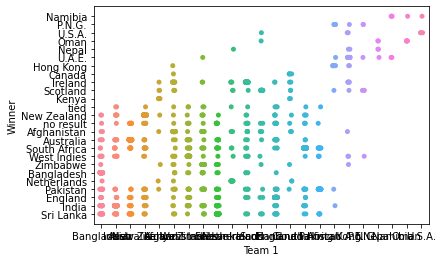

In [ ]:
# strip plot between Team 1 and Winner column
plt.figure(figsize = (20, 7))
sns.stripplot(data = df, x = "Team 1", y = "Winner")
plt.show()

From the above graph:
1. Many teams in team 1 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

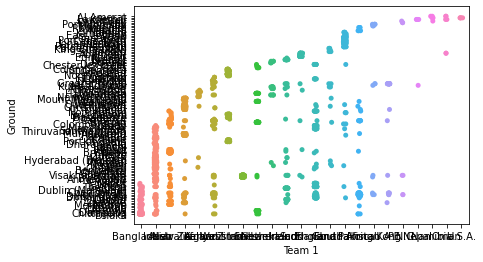

In [ ]:
# strip plot between Team 1 and Ground column
plt.figure(figsize = (20, 7))
sns.stripplot(data = df, x = "Team 1", y = "Ground")
plt.show()

From the above graph:
1. Few teams are having matches repeatedly at few range of ground.

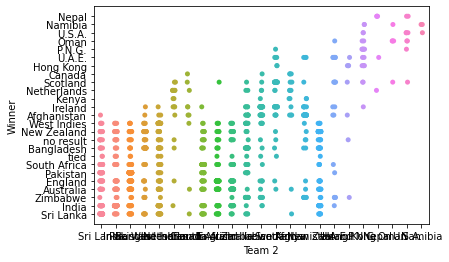

In [ ]:
# strip plot between Team 2 and Winner column
plt.figure(figsize = (20, 7))
sns.stripplot(data = df, x = "Team 2", y = "Winner")
plt.show()

From the above graph:
1. Many teams in team 2 have distribution of winner team almost same range of countries.
2. But few team such as Namibia, P.N.G, U.S.A, Oman, Nepal , Hong Kong have very few distribution of winner team and the team range is different from other teams. 

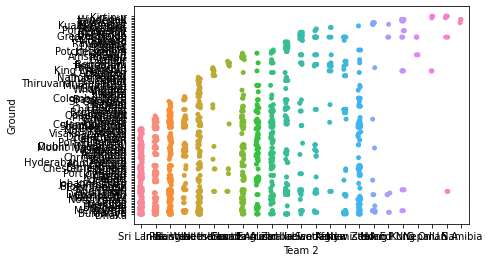

In [ ]:
# strip plot between Team 2 and Ground column
plt.figure(figsize = (20, 7))
sns.stripplot(data = df, x = "Team 2", y = "Ground")
plt.show()

From the above graph:
1. Many teams are having matches repeatedly at a particular range of ground.

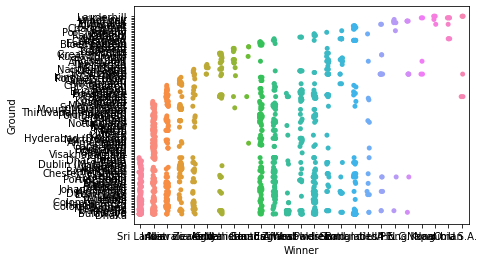

In [ ]:
# strip plot between Winner and Ground column
plt.figure(figsize = (20, 7))
sns.stripplot(data = df, x = "Winner", y = "Ground")
plt.show()

From the above graph:
1. Many Winner teams are having matches repeatedly at a particular range of ground.

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.

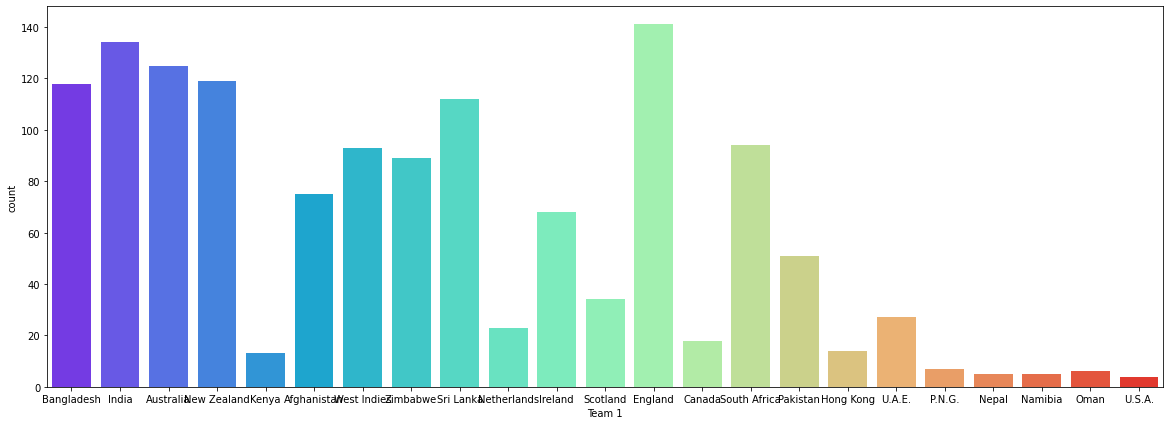

In [30]:
# count plot for Team 1 column
plt.figure(figsize = (20, 7))
sns.countplot(data = df, x = "Team 1", palette = "rainbow")
plt.show()

From above count plot

distribution of values of Team 1 is not equal over complete dataset, skewed left multimodel.

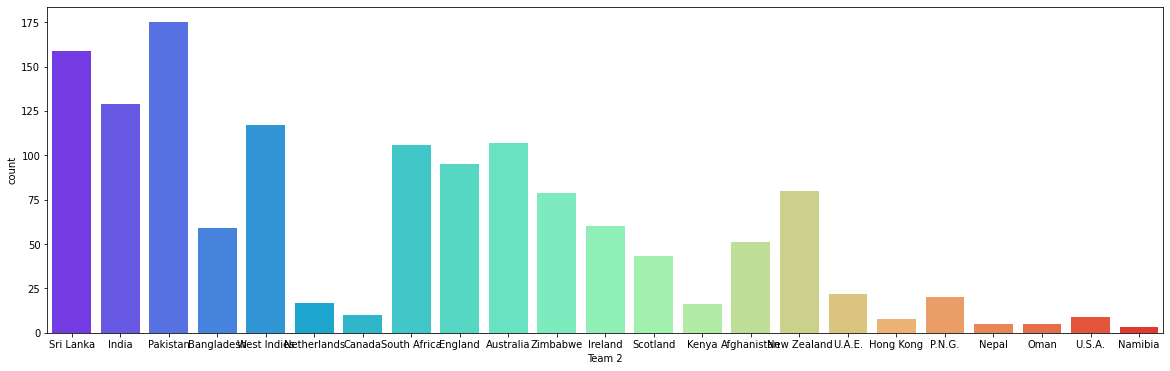

In [ ]:
# count plot for Team 2 column
plt.figure(figsize = (20, 7))
sns.countplot(data = df, x = "Team 2", palette = "rainbow")
plt.show()

From above count plot

distribution of values of team 2 is not equal over complete dataset, skewed left.

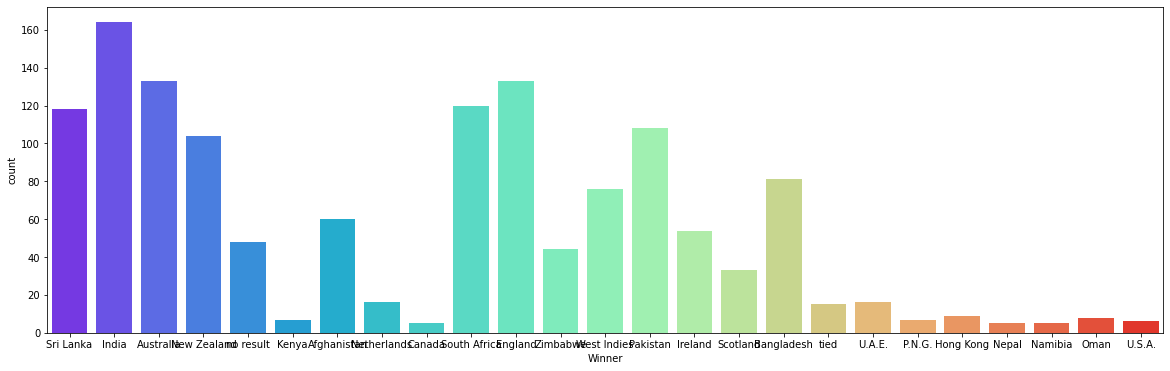

In [ ]:
# count plot for Winner column
plt.figure(figsize = (20, 7))
sns.countplot(data = df, x = "Winner", palette = "rainbow")
plt.show()

From above count plot

distribution of values of winner teams is not equal over complete dataset, skewed left, multimodel.

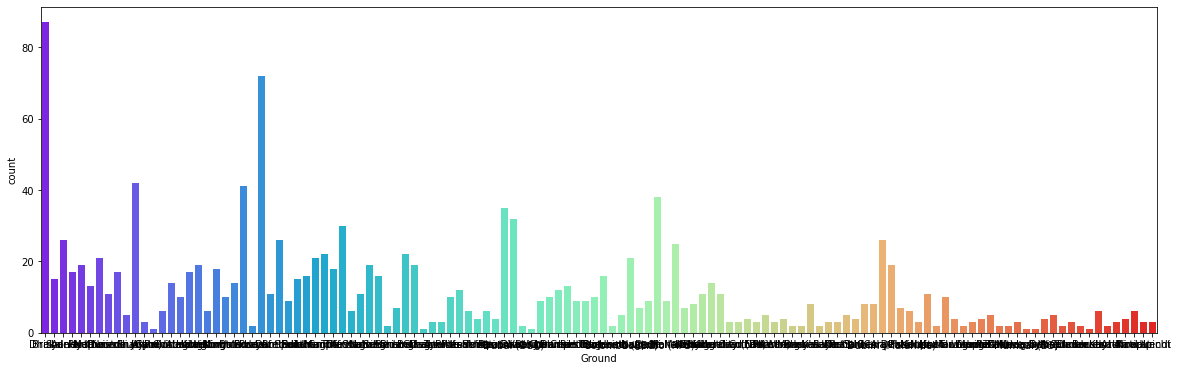

In [ ]:
# count plot for Ground column
plt.figure(figsize = (20, 7))
sns.countplot(data = df, x = "Ground", palette = "rainbow")
plt.show()

From above count plot

distribution of values of ground is not equal over complete dataset, multimodel.

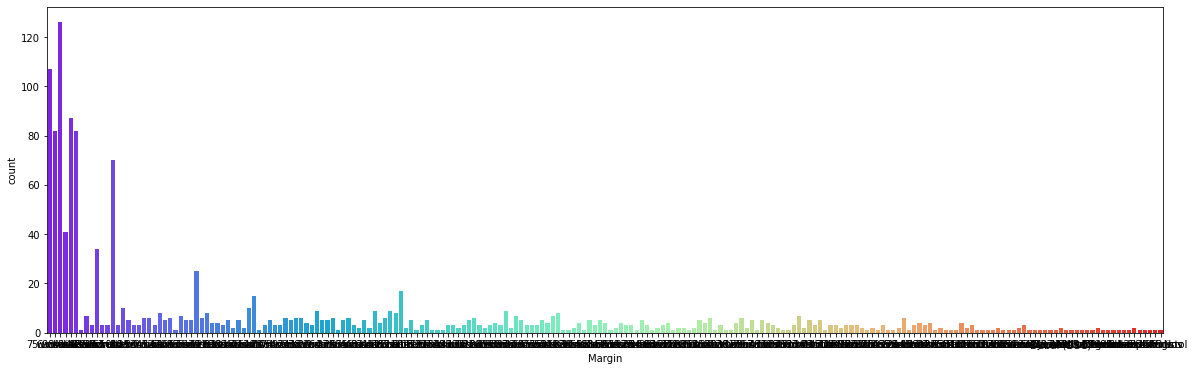

In [ ]:
# count plot for Margin column
plt.figure(figsize = (20, 7))
sns.countplot(data = df, x = "Margin", palette = "rainbow")
plt.show()

From above count plot

distribution of values of Margin is not equal over complete dataset, skewed left.

## Dendrogram

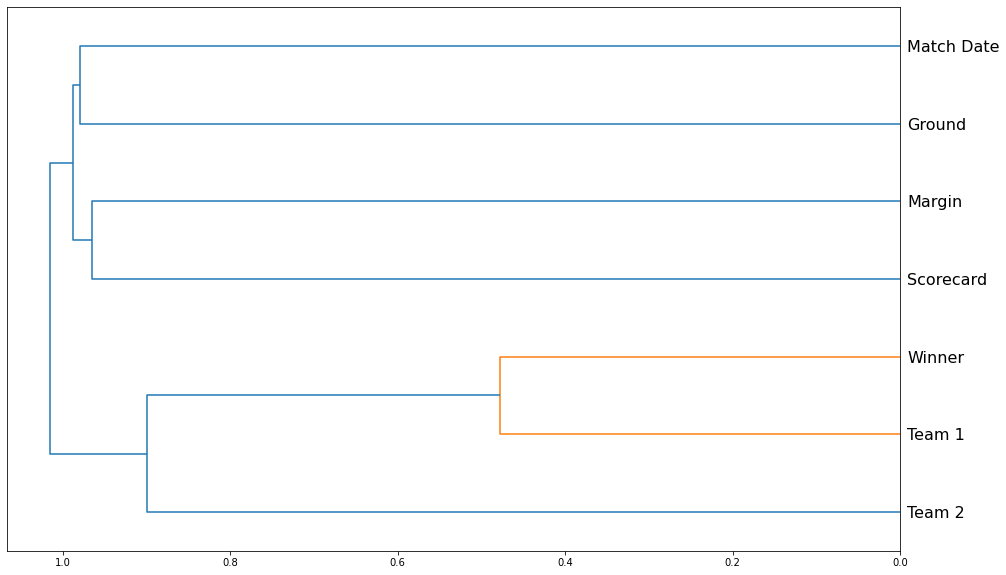

In [31]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
X = df.dropna()

import scipy
from scipy.cluster import hierarchy as hc
# import scipy, hierarchy as hc



corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1 - corr)
z = hc.linkage(corr_condensed, method = "average")
fig = plt.figure(figsize = (16, 10))
dendrogram = hc.dendrogram(z, labels = X.columns,orientation = "left", leaf_font_size = 16)
plt.show()


observation from dendrogram

Strongly correlated variables:
    Team 1 and Winner

## Since, there are missing values in Margin column of dataset

We need to drop those empty columns. Beacase all of the data is categorical and if we replace the missing values with random values it will affect the correctness of prediction.

In [ ]:
# Droping rows with missing values
df = df.dropna()

# Reseting index of samples
df.reset_index(inplace = True)
# Droping extra "index" column from dataset
df = df.drop("index", axis = 1)

In [ ]:
# Filtering out the rows which contain winner column values as 'no result' and 'tied'
df = df[(df["Winner"] != "no result") & (df["Winner"] != "tied")]
# Rest index of the datframe
df.reset_index(inplace = True)
# Drop the extra 'index' column from dataframe
df.drop("index", axis = 1, inplace = True)

In [ ]:
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"


## Feature Engineering
It is one of the most important step in workflow of machine learning. Machine learning model work well if the data provided to the model is relevant and useful.

We can break down the
Margin column which is Object data type into two columns named Won by runs and won by wickets both are numerical datatype int64


In [ ]:
# Create a list for storing runs
runs = []

# Create a list for storing wickets
wickets = []

# looping through dataset column Margin
for result in df["Margin"]: 
  # Splitting the string data by space and making a list
  split_string = result.split(" ")
  
  # Exceptin handling
  try:
    # Search for index of "run" in string, after success the index of "run" will be stored in index variable 
    index = split_string.index('run')
    # Appending the the first element from splitted data after converting to integer to won by run list created before looping 
    runs.append(int(split_string[index - 1]))
    # Appending the the 0 from splitted data to won by wicket list created before looping 
    wickets.append(0)

    # After fail --> print("-")
  except:
    print('-')  

# Exceptin handling
  try:
    # Search for index of "runs" in string, after success the index of "run" will be stored in index variable 
    index = split_string.index('runs')

    # Appending the the first element from splitted data after converting to integer to won by run list created before looping 
    runs.append(int(split_string[index - 1]))

    # Appending the the 0 from splitted data to won by wicket list created before looping 
    wickets.append(0)

    # After fail --> print("-")
  except:
    print('-')  
  
  # Exceptin handling
  try:  
    # Search for index of "wicket" in string, after success the index of "wicket" will be stored in index variable 
    index = split_string.index('wicket')

    # Appending the the first element from splitted data after converting to integer to won by wicket list created before looping 
    wickets.append(int(split_string[index - 1]))

    # Appending the the 0 from splitted data to won by run list created before looping 
    runs.append(0)

    # After fail --> print("-"):
  except:
    print('-') 

  # Exceptin handling
  try:  
    # Search for index of "wickets" in string, after success the index of "wicket" will be stored in index variable 
    index = split_string.index('wickets')

    # Appending the the first element from splitted data after converting to integer to won by wicket list created before looping 
    wickets.append(int(split_string[index - 1]))

    # Appending the the 0 from splitted data to won by run list created before looping 
    runs.append(0)

    # After fail --> print("-"):
  except:
    print('-') 

# Add a new column named 'Won_By_Runs' to Datframe with the respectiev data list
df["Won_By_Runs"] = runs
# Add a new column named 'Won_By_Wickets' to Datframe with the respectiev data list
df["Won_By_Wickets"] = wickets



-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


# Further feature engineering

We can create a two new columns named team_1_first_batting and team_2_first_batting from Won_by_runs and Won_by_wickets

Explanation:
If a team wins by run it means that the team got first chance for batting else if a team wins by wickets that means the team got first chance for bowling.

In [ ]:

# Create list to store team 1 first batting
team1_batting = []

# Create list to store team 2 first batting
team2_batting = []

# looping through Team 1, Team 2, Won_by_wickets, Won_by_runs, Winner columns simultaneously using zip method in python
for team1, team2, wickets, runs, winner in zip(df["Team 1"], df["Team 2"], df["Won_By_Wickets"], df["Won_By_Runs"], df["Winner"]):  
  # Check condition if runs are greater than 0 and team 1 is the winner 
  if int(runs) > 0 and winner == team1:
    # Append 1 to team_1_first_batting list
    team1_batting.append(1)
    # Append 0 to team_2_first_batting list
    team2_batting.append(0)
  # Check condition if runs are greater than 0 and team 2 is the winner 
  elif int(runs) > 0 and winner == team2:
    # Append 0 to team_1_first_batting list
    team1_batting.append(0)

    # Append 1 to team_2_first_batting list
    team2_batting.append(1)
  # Check condition if wickets are greater than 0 and team 1 is the winner 
  elif int(wickets) > 0 and winner == team1:
    # Append 0 to team_1_first_batting list
    team1_batting.append(0)
    # Append 1 to team_2_first_batting list
    team2_batting.append(1)
  # Check condition if wickets are greater than 0 and team 2 is the winner 
  elif int(wickets) > 0 and winner == team2:
    # Append 1 to team_1_first_batting list
    team1_batting.append(1)
    # Append 0 to team_2_first_batting list
    team2_batting.append(0)
  

# Add a column named 'Team_1_First_Batting' to Dataframe with respective data list 
df["Team_1_First_Batting"] = team1_batting
# Add a column named 'Team_2_First_Batting' to Dataframe with respective data list 
df["Team_2_First_Batting"] = team2_batting

In [ ]:
# ODI_data_2010_2021 data
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1


### Dealing with Multi Class Problem

Instead of using winner team name as target values we can use, 1 to represent team 1 as winner and 2 to represent team 2 as winner. It will reduce multiclass classification problem as using team name as label we the model have to decide correct label from more than 10 labels. Hence, using only two labels will improve the performance of the model.

In [ ]:
# Create a list for storing winner team label 1 or 2
winning_team = []

# looping through dataset columns Team 1, Team 2 and Winner simultaneously using zip method in python
for team1, team2, winner in zip(df["Team 1"], df["Team 2"], df["Winner"]):
  # Checking condition if team 1 is winner
  if winner == team1:
    # Appending 1 to winner list
    winning_team.append(1)
  # Checking condition if team 2 is winner
  if winner == team2:
    # Appending 2 to winner list
    winning_team.append(2)

# Add a column named 'Winning_team' to Dataframe with respective data list 
df["Winning_team"] = winning_team

In [ ]:
# ODI_data_2010_2021 data
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0,1,1


## Scaling

Scaling is very crucial part of teh workflow. 
As the data we have for example: 
Won_by_run has some values greater than 100 and some values around zero
the model will be dominated by this high values causing the model to under perform. Thus, we need to scale this data between particular numerical range. We use MinMaxScaler in this problem. 

In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
    
    # Import MinMaxScaler 
    scaler = MinMaxScaler()

    # Instantiate MinMaxScaler
    df[col] = scaler.fit_transform(df[col])
    # fit transform the data 
    return df
    
    # return scaled dataframe
    

In [ ]:
# Making a list of the column names to be scaled 
col = ["Won_By_Wickets", "Won_By_Runs"]

# passing data and name for scaling
scale_data(df, col)

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0.000000,0.7,1,0,2
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0.000000,0.5,1,0,2
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0.000000,0.6,1,0,2
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0.000000,0.9,1,0,2
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0.000000,0.8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0.000000,0.3,1,0,2
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",0.483636,0.0,0,1,2
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0.000000,0.4,0,1,1
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0.000000,0.3,0,1,1


In [ ]:
# Dumify the dataset columns Team 1 and Team 2 and store it in new variable
dummy = pd.get_dummies(df, prefix = ["Team 1", "Team 2"], columns = ["Team 1", "Team 2"])

In [ ]:
# dumified_data
dummy.head()

,Scorecard,Winner,Margin,Ground,Match Date,Won_By_Runs,Won_By_Wickets,Team_1_First_Batting,Team_2_First_Batting,Winning_team,...,Team 2_Oman,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,ODI # 2937,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0.0,0.7,1,0,2,...,0,0,0,0,0,1,0,0,0,0
1,ODI # 2938,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0.0,0.5,1,0,2,...,0,0,0,0,0,1,0,0,0,0
2,ODI # 2939,India,6 wickets,Dhaka,"Jan 7, 2010",0.0,0.6,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,ODI # 2940,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0.0,0.9,1,0,2,...,0,0,0,0,0,1,0,0,0,0
4,ODI # 2941,India,8 wickets,Dhaka,"Jan 10, 2010",0.0,0.8,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Seperate feature and target variables
# create variable to store datframe without 'Scorecard','Margin','Winner','Ground','Winning_team','Match Date' data
X = dummy.drop(['Scorecard','Margin','Winner','Ground','Winning_team','Match Date'], axis = 1)
# Create varaiable to store 'Winning_team' data
y = df["Winning_team"]


In [ ]:
# Create test_data_x and test_data_y variable with samples all 2021 data
test_data_x = X[1269:]
test_data_y = y[1269:]

In [ ]:
# Drop range of 2021 data from feature variable 
X = X.drop(range(1269, 1312), axis =0)


In [ ]:
# Drop range of 2021 data from feature variable 
y = y.drop(range(1269, 1312), axis =0)


In [ ]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split

# split the data into train set of size 80% and valid set of size 20% with random_state = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## Modeling

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Function for calculating all the relevant metrics 
def print_score(m):

    res = classification_report(y_test, m.predict(X_test))
    
    print("Classification Report \n",res)

In [ ]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], axis = 0, ignore_index = True)
    

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby("column").sum()[["feature_importance"]].sort_values("feature_importance", ascending = False).index[:50]

    
    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize = (8, max(6, len(order) * 0.25)))
    sns.boxenplot(data = feature_importance_df, x = "feature_importance", y = "column", ax= ax, order = order, palette = "viridis", orient = "h")
    ax.tick_params(axis = "x", rotation = 0)
    ax.set_title("Grid")
    ax.grid()
    fig.tight_layout()
   
   
    return fig, ax

 


### LogisticRegression

1. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

2. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

Train Accuracy:  0.7083743842364532
Test Accuracy:  0.6771653543307087
Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.85      0.76       151
           2       0.66      0.43      0.52       103

    accuracy                           0.68       254
   macro avg       0.67      0.64      0.64       254
weighted avg       0.67      0.68      0.66       254

CPU times: user 285 ms, sys: 138 ms, total: 423 ms
Wall time: 275 ms


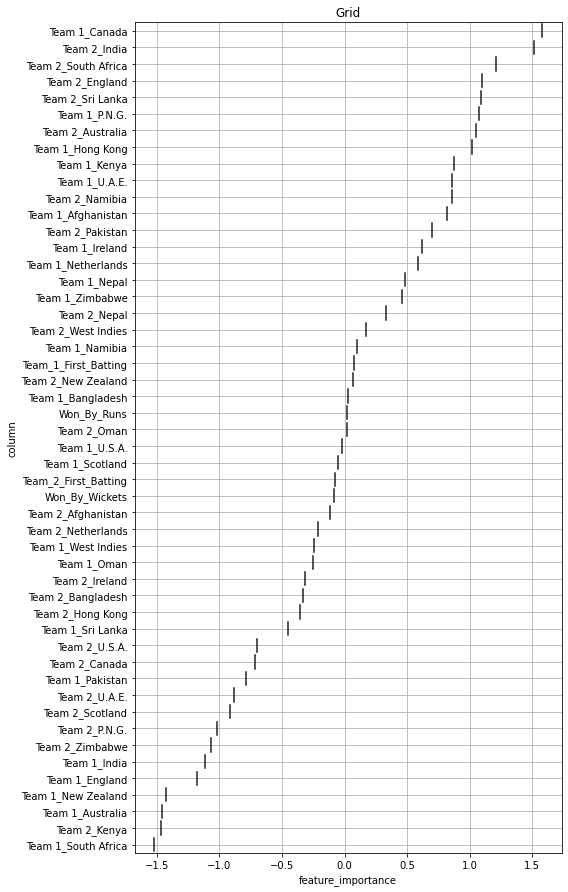

In [ ]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegression
from sklearn.linear_model import LogisticRegression


# Instantiate the model
log_class = LogisticRegression()


# fitting the model on train data
log_class.fit(X_train, y_train)

print("Train Accuracy: ", log_class.score(X_train, y_train))
print("Test Accuracy: ", log_class.score(X_test, y_test))

# print score of the model
print_score(log_class)


# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0], X)

# X_train.shape, y_train.shape

### RandomForestClassifier

Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

Train Accuracy:  0.7083743842364532
Test Accuracy:  0.6771653543307087
Classification Report 
               precision    recall  f1-score   support

           1       0.97      1.00      0.99       151
           2       1.00      0.96      0.98       103

    accuracy                           0.98       254
   macro avg       0.99      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254

CPU times: user 476 ms, sys: 98.2 ms, total: 575 ms
Wall time: 504 ms


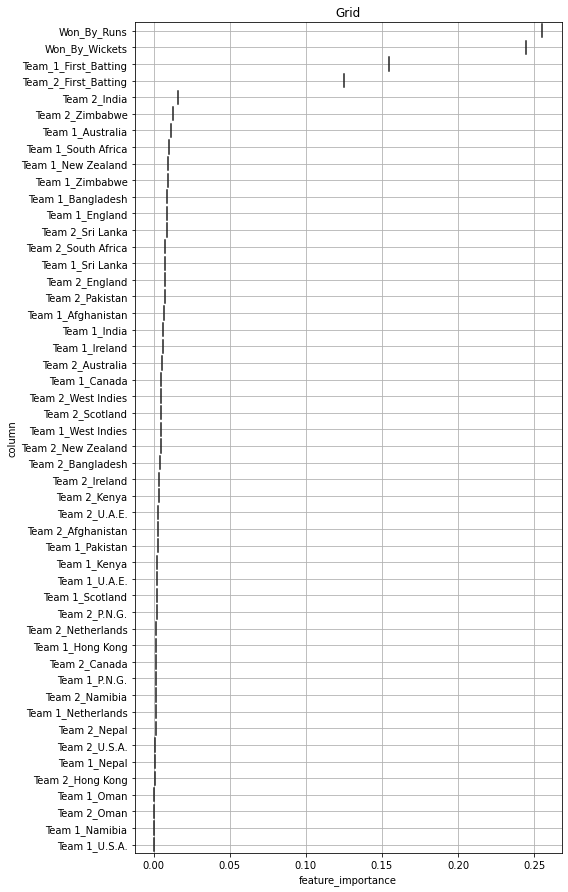

In [ ]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


# Instantiate the model
rf_clf = RandomForestClassifier()


# fitting the model on train data

rf_clf.fit(X_train, y_train)

print("Train Accuracy: ", log_class.score(X_train, y_train))
print("Test Accuracy: ", log_class.score(X_test, y_test))

# print score of the model

print_score(rf_clf)

# visualizing importance of features
fig, ax = visualize_importance(rf_clf.feature_importances_, X)



Train Accuracy:  1.0
Test Accuracy:  0.9921259842519685
Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       151
           2       1.00      0.98      0.99       103

    accuracy                           0.99       254
   macro avg       0.99      0.99      0.99       254
weighted avg       0.99      0.99      0.99       254

CPU times: user 479 ms, sys: 14.8 ms, total: 493 ms
Wall time: 484 ms


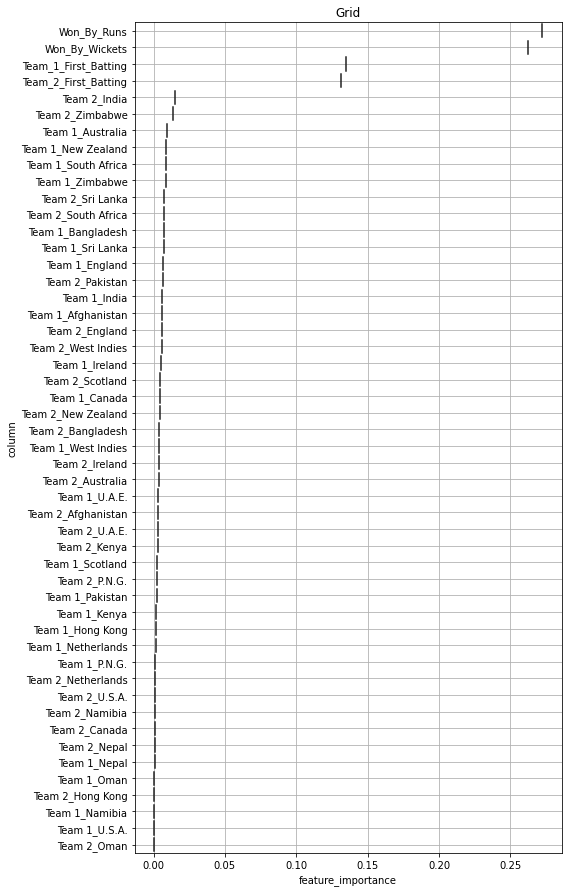

In [ ]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


# Instantiate the model
rf_clf = RandomForestClassifier()


# fitting the model on train data

rf_clf.fit(X_train, y_train)

print("Train Accuracy: ", rf_clf.score(X_train, y_train))
print("Test Accuracy: ", rf_clf.score(X_test, y_test))

# print score of the model

print_score(rf_clf)

# visualizing importance of features
fig, ax = visualize_importance(rf_clf.feature_importances_, X)



### XGBClassifier

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. 
It implements machine learning algorithms under the Gradient Boosting framework.

Train Accuracy:  0.916256157635468
Test Accuracy:  0.8385826771653543
Classification Report 
               precision    recall  f1-score   support

           1       0.80      0.97      0.88       151
           2       0.93      0.65      0.77       103

    accuracy                           0.84       254
   macro avg       0.87      0.81      0.82       254
weighted avg       0.85      0.84      0.83       254

CPU times: user 340 ms, sys: 5.51 ms, total: 345 ms
Wall time: 343 ms


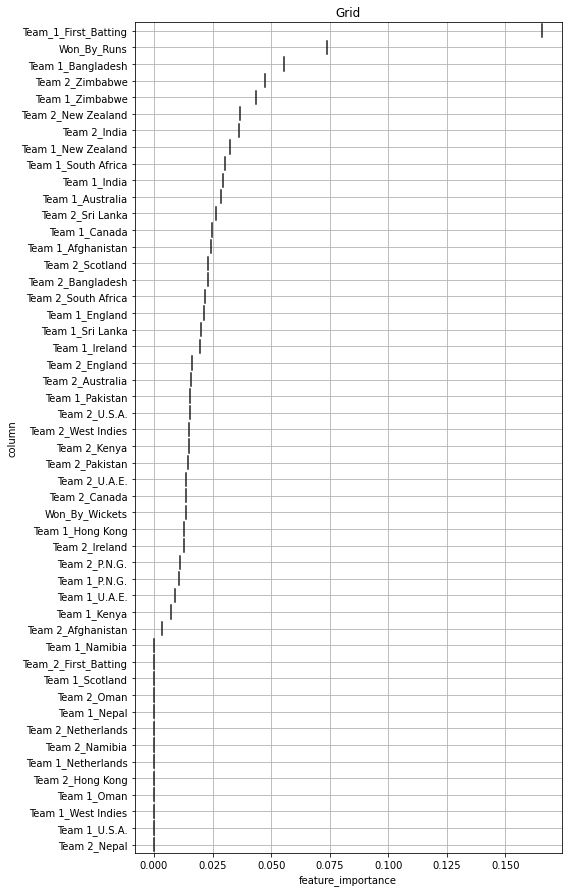

In [ ]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier
from xgboost import XGBClassifier


# Instantiate the model
xgb_clf = XGBClassifier()


# fitting the model on train data
xgb_clf.fit(X_train, y_train)

print("Train Accuracy: ", xgb_clf.score(X_train, y_train))
print("Test Accuracy: ", xgb_clf.score(X_test, y_test))

# print score of the model
print_score(xgb_clf)


# visualizing importance of features
fig, ax = visualize_importance(xgb_clf.feature_importances_, X)



### Support Vector Classifier

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.


In [ ]:
%%time
# Fit a support vector classifier model to the train dataset

#import SVC
from sklearn.svm import SVC

# Instantiate the model
svc = SVC()

#fit the model on train data

svc.fit(X_train, y_train)

print("Train Accuracy: ", svc.score(X_train, y_train))
print("Test Accuracy: ", svc.score(X_test, y_test))

print_score(svc)


Train Accuracy:  0.9763546798029556
Test Accuracy:  0.9448818897637795
Classification Report 
               precision    recall  f1-score   support

           1       0.93      0.98      0.95       151
           2       0.97      0.89      0.93       103

    accuracy                           0.94       254
   macro avg       0.95      0.94      0.94       254
weighted avg       0.95      0.94      0.94       254

CPU times: user 125 ms, sys: 738 µs, total: 126 ms
Wall time: 126 ms


### GaussianNB

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. 
It's specifically used when the features have continuous values. 
It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [ ]:
%%time
# Fit a GaussianNB model to the train dataset

# Import GaussianNB
from sklearn.naive_bayes import GaussianNB


# Instantiate the model
gnb = GaussianNB()

# Fit the model to the data
gnb.fit(X_train, y_train)

# print score on train and valid set 
print_score(gnb)

print("Train Accuracy: ", gnb.score(X_train, y_train))
print("Test Accuracy: ", gnb.score(X_test, y_test))

# print classification report of the model using function created before


Classification Report 
               precision    recall  f1-score   support

           1       0.63      0.93      0.75       151
           2       0.67      0.21      0.32       103

    accuracy                           0.64       254
   macro avg       0.65      0.57      0.54       254
weighted avg       0.65      0.64      0.58       254

Train Accuracy:  0.6285714285714286
Test Accuracy:  0.6377952755905512
CPU times: user 28.7 ms, sys: 1.12 ms, total: 29.8 ms
Wall time: 28.2 ms


### K Neighbors Classifier

K-Nearest Neighbor is a simple supervised classification algorithm.
It can be used for regression as well as classification.
It is non-parametric as it does not make assumption on the data distribution.

In [ ]:
%%time
# Fit a K-Neighbour classifier model to the train dataset

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


# Instantiate the model
knn_clf = KNeighborsClassifier()


# fitting the model on train data
knn_clf.fit(X_train, y_train)

print("Train Accuracy: ", knn_clf.score(X_train, y_train))
print("Test Accuracy: ", knn_clf.score(X_test, y_test))

# print score of the model
print_score(knn_clf)



Train Accuracy:  0.8866995073891626
Test Accuracy:  0.8385826771653543
Classification Report 
               precision    recall  f1-score   support

           1       0.85      0.89      0.87       151
           2       0.82      0.77      0.79       103

    accuracy                           0.84       254
   macro avg       0.84      0.83      0.83       254
weighted avg       0.84      0.84      0.84       254

CPU times: user 153 ms, sys: 114 ms, total: 267 ms
Wall time: 152 ms


### Decision Tree Classifier

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

Train Accuracy:  1.0
Test Accuracy:  0.9724409448818898
Classification Report 
               precision    recall  f1-score   support

           1       0.96      0.99      0.98       151
           2       0.99      0.94      0.97       103

    accuracy                           0.97       254
   macro avg       0.98      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254

CPU times: user 547 ms, sys: 63.3 ms, total: 610 ms
Wall time: 553 ms


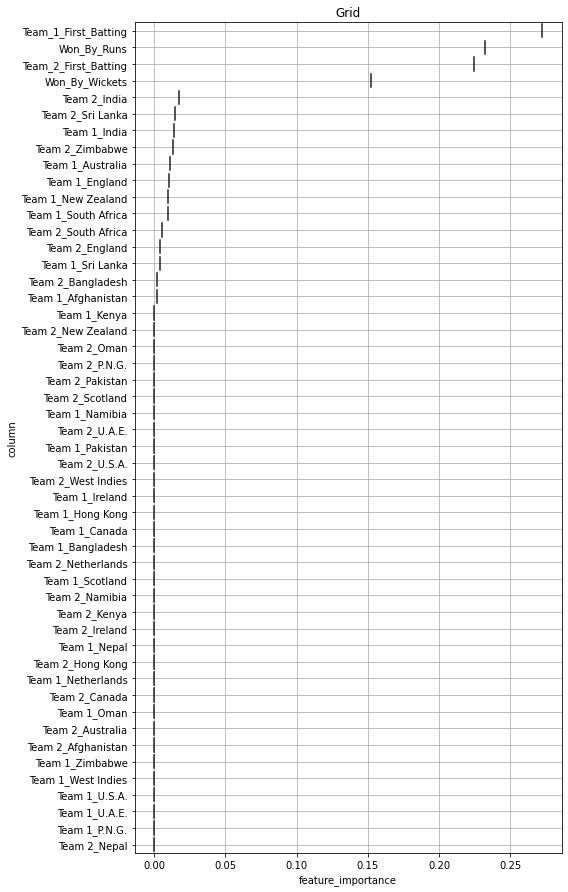

In [ ]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt_clf = DecisionTreeClassifier()


# fitting the model on train data
dt_clf.fit(X_train, y_train)

print("Train Accuracy: ", dt_clf.score(X_train, y_train))
print("Test Accuracy: ", dt_clf.score(X_test, y_test))

# print score of the model
print_score(dt_clf)



# visualizing importance of features
fig, ax = visualize_importance(dt_clf.feature_importances_, X)



### Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       151
           2       1.00      0.98      0.99       103

    accuracy                           0.99       254
   macro avg       0.99      0.99      0.99       254
weighted avg       0.99      0.99      0.99       254

Train Accuracy:  0.9970443349753695
Test Accuracy:  0.9921259842519685
CPU times: user 372 ms, sys: 9.62 ms, total: 381 ms
Wall time: 379 ms


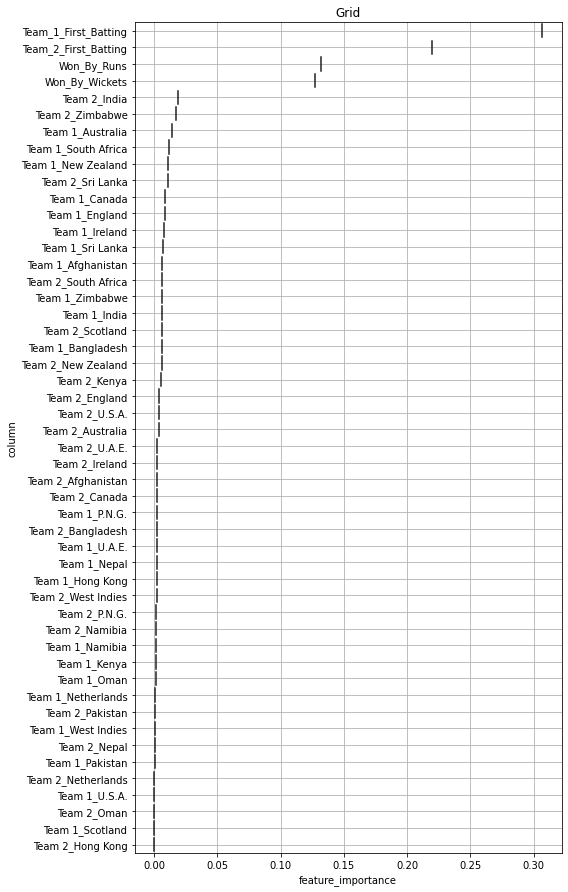

In [ ]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
GBR_clf = GradientBoostingClassifier()


# fitting the model on train data
GBR_clf.fit(X_train, y_train)


# print score of the model

print_score(GBR_clf)

print("Train Accuracy: ", GBR_clf.score(X_train, y_train))
print("Test Accuracy: ", GBR_clf.score(X_test, y_test))

# visualizing importance of features
fig, ax = visualize_importance(GBR_clf.feature_importances_, X)



### Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [ ]:
%%time
# Fit a Bagging Classifier model to the train dataset

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier


# Instantiate the model
bg_clf = BaggingClassifier()


# fitting the model on train data
bg_clf.fit(X_train, y_train)

print("Train Accuracy: ", bg_clf.score(X_train, y_train))
print("Test Accuracy: ", bg_clf.score(X_test, y_test))


# print score of the model
print_score(bg_clf)



Train Accuracy:  0.9980295566502463
Test Accuracy:  0.9724409448818898
Classification Report 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98       151
           2       1.00      0.93      0.96       103

    accuracy                           0.97       254
   macro avg       0.98      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254

CPU times: user 69.6 ms, sys: 1.03 ms, total: 70.7 ms
Wall time: 68.8 ms


### Easy Ensemble Classifier

This algorithm is known as EasyEnsemble.
The classifier is an ensemble of AdaBoost learners trained on different balanced boostrap samples. 
The balancing is achieved by random under-sampling.

In [ ]:
# %%time
# # Fit a EasyEnsembleClassifier model to the train dataset

# # Import EasyEnsembleClassifier
# from imblearn.ensemble import EasyEnsembleClassifier

# # Instantiate the model
# easy = EasyEnsembleClassifier(n_estimators=10)

# # fitting the model on train data
# easy.fit(X_train, y_train)

# # print score on train and valid set 
# # print("Train Accuracy: ", eec.score(X_train, y_train))
# # print("Test Accuracy: ", eec.score(X_test, y_test))

# # print classification report of the model using function created before
# # print_score(eec)

### AdaBoost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Train Accuracy:  0.696551724137931
Test Accuracy:  0.6732283464566929
Classification Report 
               precision    recall  f1-score   support

           1       0.69      0.83      0.75       151
           2       0.64      0.45      0.53       103

    accuracy                           0.67       254
   macro avg       0.66      0.64      0.64       254
weighted avg       0.67      0.67      0.66       254

CPU times: user 358 ms, sys: 14.7 ms, total: 373 ms
Wall time: 378 ms


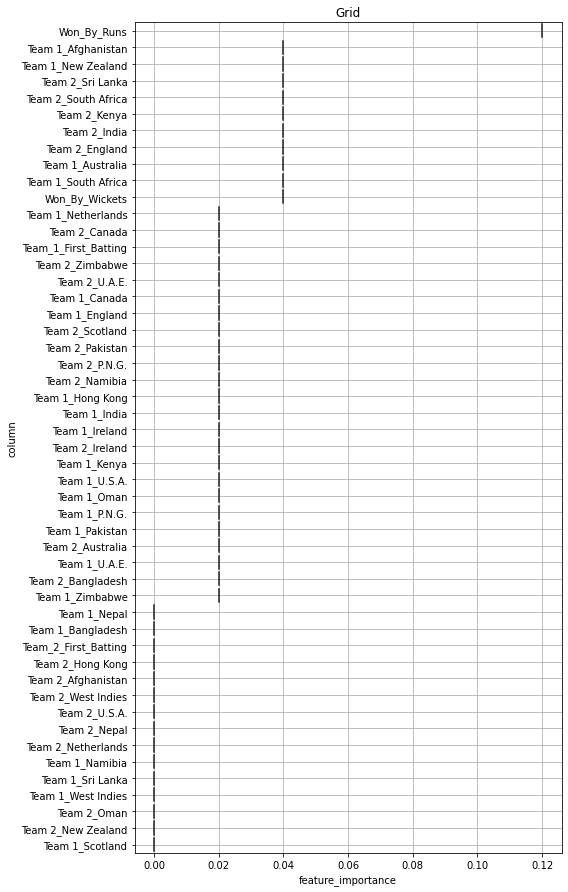

In [ ]:
%%time
# Fit a AdaBoost classifier model to the train dataset

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


# Instantiate the model
Ada_clf = AdaBoostClassifier()


# fitting the model on train data
Ada_clf.fit(X_train, y_train)

print("Train Accuracy: ", Ada_clf.score(X_train, y_train))
print("Test Accuracy: ", Ada_clf.score(X_test, y_test))

# print score of the model
print_score(Ada_clf)


# visualizing importance of features
fig, ax = visualize_importance(Ada_clf.feature_importances_, X)



### Now working with test dataset (year 2021 matches)

In [ ]:
# test data labels 
test_y_df = pd.DataFrame(test_data_y)
test_y_df


,Winning_team
1269,2
1270,1
1271,1
1272,1
1273,1
1274,1
1275,1
1276,1
1277,1
1278,1


In [ ]:
# Creating a dataframe for with data Team 1 , Team 2 and Winner with data of all year 2021 matches
match_result = pd.DataFrame()
match_result["Team 1"] = df["Team 1"][1269:]
match_result["Team 2"] = df["Team 2"][1269:]
match_result["Winner"] = df["Winner"][1269:] 

In [ ]:
match_result.head()

,Team 1,Team 2,Winner
1269,U.A.E.,Ireland,Ireland
1270,Bangladesh,West Indies,Bangladesh
1271,Afghanistan,Ireland,Afghanistan
1272,Bangladesh,West Indies,Bangladesh
1273,Afghanistan,Ireland,Afghanistan


In [ ]:
test_data_y = pd.DataFrame(test_data_y, columns = ["Winning_team"])
test_data_y.head()

,Winning_team
1269,2
1270,1
1271,1
1272,1
1273,1


In [ ]:
# Predicting on test data 
predicted_winner = knn_clf.predict(test_data_x)

#  Creating a dataframe with columns "Actual" and "Predicted"
res = pd.DataFrame()

# 'Actual' column data is true test y label
res["Actual"] = test_data_y["Winning_team"]

# 'Predicted' column is predicted labels
res["Predicted"] = predicted_winner

# creat a list for storing coverted winner data from numerical label to object
pred_winner = []

# looping through res['Predicted'],teams['Team 1'],teams['Team 2'] simultaneously using zip function in python
for pred, team1, team2 in zip(res["Predicted"], match_result["Team 1"], match_result["Team 1"]):

    # Check condition if predicted label is equal to 1
    if pred == 1:
        # Append winner list the object name of team 1
        pred_winner.append(team1)
    # Check condition if predicted label is equal to 2
    elif pred == 2:
        # Append winner list the object name of team 2
        pred_winner.append(team1)
       

# Add a column 'PPred_Winner' with predicted winner data list
match_result["PPred_Winner"] = pred_winner


In [ ]:
# match_result data
match_result

,Team 1,Team 2,Winner,PPred_Winner
1269,U.A.E.,Ireland,Ireland,U.A.E.
1270,Bangladesh,West Indies,Bangladesh,Bangladesh
1271,Afghanistan,Ireland,Afghanistan,Afghanistan
1272,Bangladesh,West Indies,Bangladesh,Bangladesh
1273,Afghanistan,Ireland,Afghanistan,Afghanistan
1274,Bangladesh,West Indies,Bangladesh,Bangladesh
1275,Afghanistan,Ireland,Afghanistan,Afghanistan
1276,West Indies,Sri Lanka,West Indies,West Indies
1277,West Indies,Sri Lanka,West Indies,West Indies
1278,West Indies,Sri Lanka,West Indies,West Indies


## Conclusion

As we used different models for predicting match winner. we have seen that Random forest outperformed all other model. Accuracy of 100% on train data set and around 98% on validation set with f1 score more than 95% that is really good.

Also other models such as SVC, KNN classifier, Decision tree classifier and Gradient Boost classifier performed really well with acuarcy more than 90% and f1 score above 90%.

We understood how important is it to do feature engineering, feature scaling before feeding the data to model also we handled multiclass classification problem by converting it two class.

The prediction of winner in matches played in year 2021 were almost all were predicted correctly.